# Proyecto Integrador

In [53]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Avance 1

In [6]:
data = pd.read_csv("data_latinoamerica.csv",sep=',') 
#en este caso no hace falta aclarar que sea separado por comas 

In [7]:
data

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216052,VE_Z,2022-09-13,VE,Venezuela,NaN,NaN,NaN,NaN,NaN,1422000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12216053,VE_Z,2022-09-14,VE,Venezuela,NaN,NaN,NaN,NaN,NaN,1422000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12216054,VE_Z,2022-09-15,VE,Venezuela,NaN,NaN,NaN,NaN,NaN,1422000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12216055,VE_Z,2022-09-16,VE,Venezuela,NaN,NaN,NaN,NaN,NaN,1422000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
np.shape(data)

(12216057, 50)

In [9]:
#otra manera de hacer lo anterior es:
data.shape

(12216057, 50)

#### Siguiendo con lo pedido nos enfocamos en los 6 paises que nos piden

In [10]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)]

#### Ahora venmos la cantidad de instancias que tenemos

In [11]:
np.shape(data_latinoamerica)

(11970289, 50)

#### Ahora verifivamos la calidad de los datos. Chequeamos la cantidad de datos faltantes por columna y en caso de necesitar hacemos una limpieza de datos donde hayan valores mayores a 4 millones

In [12]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


#### Despues de este analisis podemos apreciar que hay datos faltantes en muchas columnas, por esto realizamos un filtro sobre la columna de location_key pero vamos a utilizar las instancias que correspondan a los paises que hemos seleccionado y no sia regiones o subregiones.

In [13]:
data_latinoamerica_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

#### Ahore para un mejor manejo y comprension de los datos seleccionamos los datos a partir del 1 de enero de 2021

In [14]:
data_latinoamerica_paises_fechas=data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

#### Teniendo en cuenta el filtro anterior chequeamos la cantidad de nulos y en caso de tenerlos los eliminamos

In [15]:
#contamos los valores nulos
valores_nulos_fecha=data_latinoamerica_paises_fechas.isnull().sum()[data_latinoamerica_paises_fechas.isnull().sum()>0] 
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_fechas))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


#### Usamos un for para completar los valores nulos de las columnas de la media de cada pais

In [16]:
for pais in paises_seleccionados:
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "new_confirmed"] = data_latinoamerica_paises_fechas["new_confirmed"].fillna(round(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "new_confirmed"].mean())) # se utiliza la funcion round para redondear los valores a enteros
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "new_deceased"] = data_latinoamerica_paises_fechas["new_deceased"].fillna(round(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "new_deceased"].mean())) # se utiliza la funcion round para redondear los valores a enteros
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_confirmed"] = data_latinoamerica_paises_fechas["cumulative_confirmed"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_confirmed"].ffill()) # relleno de nulos con el valor anterior
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_deceased"] = data_latinoamerica_paises_fechas["cumulative_deceased"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_deceased"].ffill()) # relleno de nulos con el valor anterior
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_vaccine_doses_administered"] = data_latinoamerica_paises_fechas["cumulative_vaccine_doses_administered"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_vaccine_doses_administered"].bfill()) # relleno de nulos con el valor anterior
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_vaccine_doses_administered"] = data_latinoamerica_paises_fechas["cumulative_vaccine_doses_administered"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "cumulative_vaccine_doses_administered"].ffill()) # relleno de algunos nulos que quedaban sin completar
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "average_temperature_celsius"] = data_latinoamerica_paises_fechas["average_temperature_celsius"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "average_temperature_celsius"].mean())
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "minimum_temperature_celsius"] = data_latinoamerica_paises_fechas["minimum_temperature_celsius"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "minimum_temperature_celsius"].mean())
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "maximum_temperature_celsius"] = data_latinoamerica_paises_fechas["maximum_temperature_celsius"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "maximum_temperature_celsius"].mean())
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "rainfall_mm"] = data_latinoamerica_paises_fechas["rainfall_mm"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "rainfall_mm"].mean())
    data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "relative_humidity"] = data_latinoamerica_paises_fechas["relative_humidity"].fillna(data_latinoamerica_paises_fechas.loc[data_latinoamerica_paises_fechas["country_name"]==pais, "relative_humidity"].mean())
   



#### Volvemos a verificar la cantidad de nulos

In [17]:
print(data_latinoamerica_paises_fechas.isnull().sum()[data_latinoamerica_paises_fechas.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_fechas))

new_recovered           2116
cumulative_recovered    2736
dtype: int64
(3744, 50)


#### Guardamos el DS filtrado a un nuevo archivo csv para no tener que cargar el archivo original t asi tener un mejor manejo de los datos ya que va a ser mas facil de manejar

In [18]:
data_latinoamerica_paises_fechas.to_csv("DatosfinalesFiltrado.csv",index=False)

#### Ahora podemos reiniciar el notebook y cargar el archivo filtrado

In [54]:
data_latinoamerica_paises=pd.read_csv("DatosfinalesFiltrado.csv",sep=',')

In [3]:
i=0
while i<len(data_latinoamerica_paises.columns):
    print(data_latinoamerica_paises.columns[i])
    print(data_latinoamerica_paises[data_latinoamerica_paises.columns[i]].describe())
    print('-------------------------------------------')
    i+=1

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-------------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------------------------
new_deceased
count     3744.000000
mean       276.886218
std        507.240060
min        

#### La anterior exploracion tambien pordriamos hacerla mediante un for

In [3]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('-------------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------------------
new_deceased
count     3744.000000
mean       276.886218
std        507.240060
min          0.000000
25%         26.0000

#### Creamos una función que permita obtener la mediana, varianza y el rango.

In [4]:
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('mediana: ',data[i].median())
            print('varianza: ',data[i].var())
            print('rango: ',data[i].max()-data[i].min())
            print('moda: ',data[i].mode())
            print('--------------------------------------')
        
describir_datos(data_latinoamerica_paises)        

new_confirmed
mediana:  5214.0
varianza:  586577491.1622744
rango:  298981.0
moda:  0    0.0
Name: new_confirmed, dtype: float64
--------------------------------------
new_deceased
mediana:  100.5
varianza:  257292.47863447666
rango:  11447.0
moda:  0    0.0
Name: new_deceased, dtype: float64
--------------------------------------
cumulative_confirmed
mediana:  3643377.0
varianza:  64081091330927.14
rango:  34567862.0
moda:  0    6304317.0
Name: cumulative_confirmed, dtype: float64
--------------------------------------
cumulative_deceased
mediana:  139628.5
varianza:  33487916463.656017
rango:  685202.0
moda:  0    141708.0
Name: cumulative_deceased, dtype: float64
--------------------------------------
cumulative_vaccine_doses_administered
mediana:  47784908.0
varianza:  8760377004967806.0
rango:  347868463.0
moda:  0    209673612.0
Name: cumulative_vaccine_doses_administered, dtype: float64
--------------------------------------
population
mediana:  47910798.0
varianza:  45074784396

## Avance 2

#### Cargamos las librerias 

#### Exploramos las propiedades estadísticas del dataset. Calculamos medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio

In [5]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('-------------------------') #esto es mas que nada oara dividir visualmente

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------
new_deceased
count     3744.000000
mean       276.886218
std        507.240060
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      1144

In [6]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

#### Ahora ponrmos como indice la columna date para hacer el analisis  lo largo del tiempo 

In [7]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)


#### Representamo los hallazgos por cada país o de manera general a través de gráficos y/o visualizaciones

##### Histograma de incidencia de COVID-19

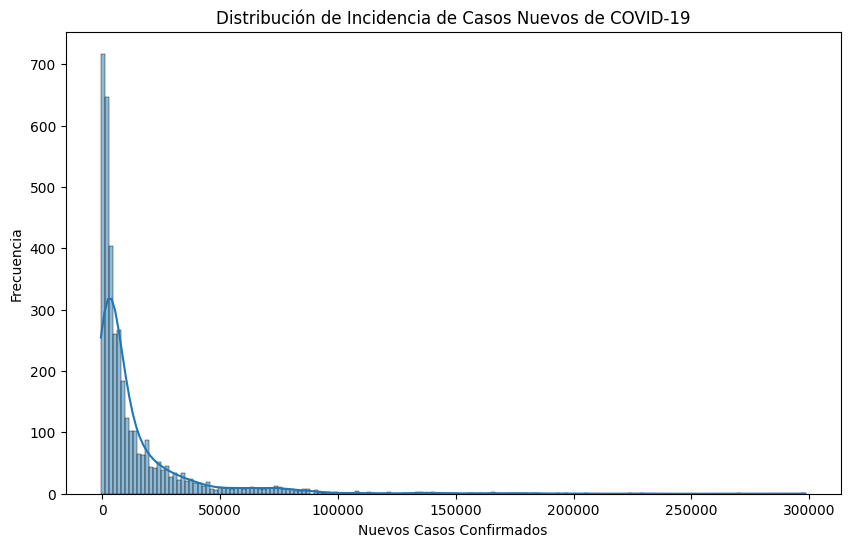

In [8]:
# para entender la distribución de la incidencia de COVID-19 y las tasas de vacunación
plt.figure(figsize=(10,6))
sns.histplot(data_latinoamerica_paises['new_confirmed'], kde=True)
plt.title('Distribución de Incidencia de Casos Nuevos de COVID-19')
plt.xlabel('Nuevos Casos Confirmados')
plt.ylabel('Frecuencia')
plt.show()

#### Este gráfico nos permite ver cómo varía la incidencia de nuevos casos confirmados de COVID-19 entre los países, y si la distribución es simétrica, sesgada o si presenta varias tendencias.

#### Gráfico de densidad de la tasa de vacunación

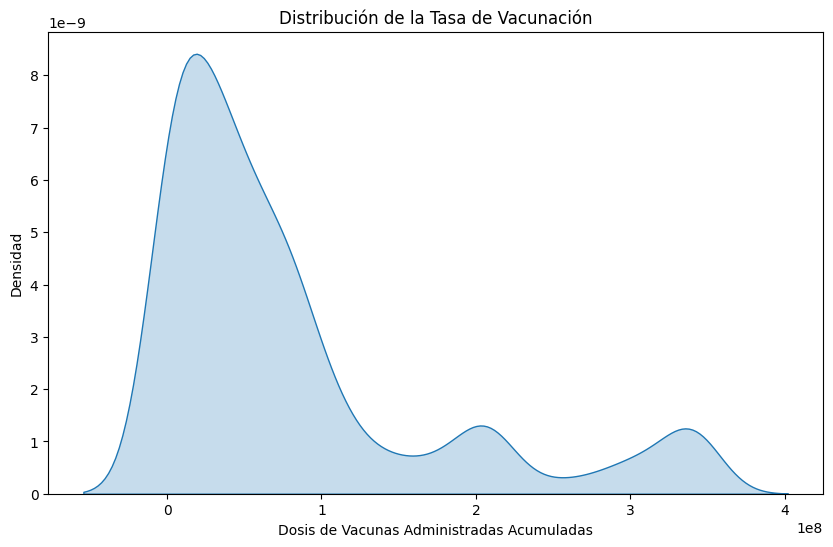

In [45]:

plt.figure(figsize=(10,6))
sns.kdeplot(data_latinoamerica_paises['cumulative_vaccine_doses_administered'], fill=True)
plt.title('Distribución de la Tasa de Vacunación')
plt.xlabel('Dosis de Vacunas Administradas Acumuladas')
plt.ylabel('Densidad')
plt.show()

#### Este gráfico nos ayuda a visualizar la distribución de las tasas de vacunación (medidas por las dosis administradas acumuladas) y cómo varían entre los países.

#### Comparación de dosis administradas entre países

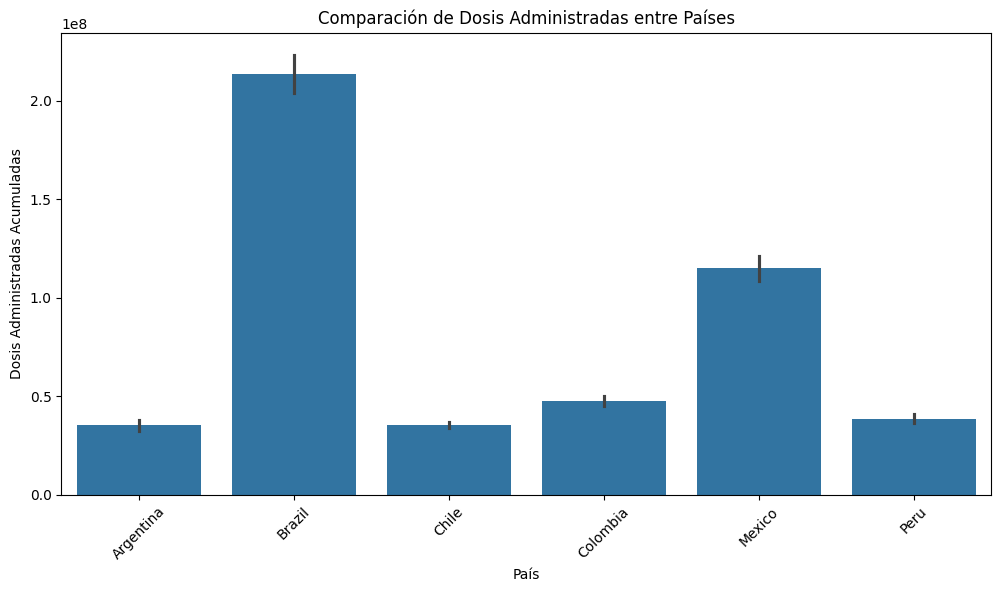

In [34]:
# Comparación de dosis administradas entre países
plt.figure(figsize=(12,6))
sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=data_latinoamerica_paises)
plt.title('Comparación de Dosis Administradas entre Países')
plt.xlabel('País')
plt.ylabel('Dosis Administradas Acumuladas')
plt.xticks(rotation=45)
plt.show()


#### Este gráfico permite hacer una comparación visual de las dosis de vacunas administradas en cada país. Los países con barras más altas han administrado más dosis acumuladas de vacunas, mientras que los países con barras más bajas han administrado menos dosis.

#### Graficos de dispersion 
##### El primero entre Temperatura Media y Casos Confirmados de COVID-19 y el segundo entre Temperatura Media y Muertes Confirmadas


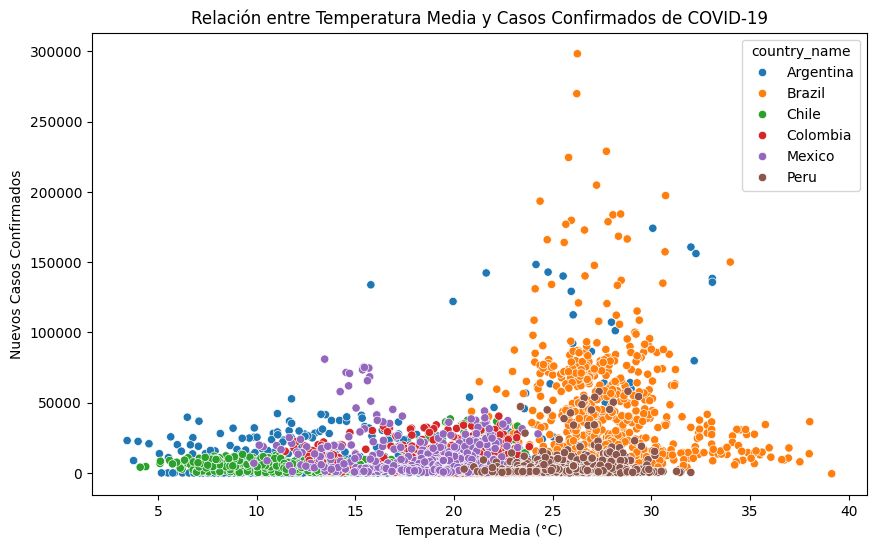

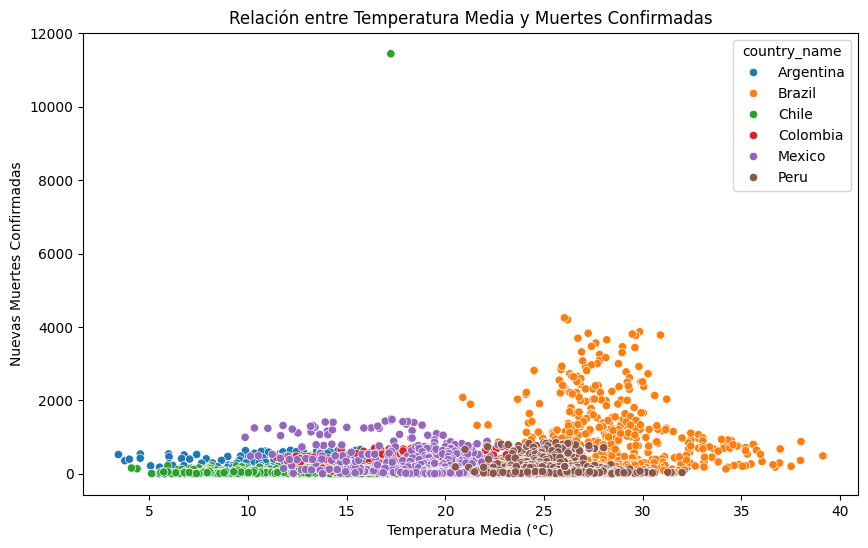

In [28]:
# Dispersión de temperatura media vs casos confirmados
plt.figure(figsize=(10,6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', hue='country_name', data=data_latinoamerica_paises)
plt.title('Relación entre Temperatura Media y Casos Confirmados de COVID-19')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Nuevos Casos Confirmados')
plt.show()

# Dispersión de temperatura media vs muertes confirmadas
plt.figure(figsize=(10,6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', hue='country_name', data=data_latinoamerica_paises)
plt.title('Relación entre Temperatura Media y Muertes Confirmadas')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Nuevas Muertes Confirmadas')
plt.show()


#### Estos gráficos proporcionan una visión comparativa de cómo las condiciones climáticas podrían estar relacionadas con los efectos del COVID-19 en distintos países.

####  Gráfico de líneas múltiples 

<Figure size 1200x600 with 0 Axes>

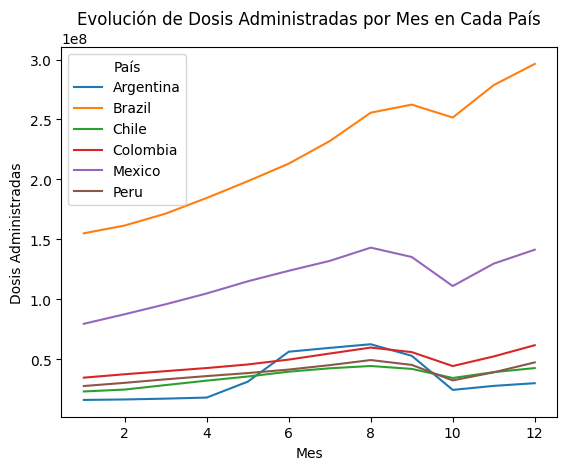

In [29]:
# Evolución de dosis administradas por mes
data_latinoamerica_paises['month'] = data_latinoamerica_paises.index.month
dosis_mensual = data_latinoamerica_paises.groupby(['country_name', 'month'])['cumulative_vaccine_doses_administered'].mean().unstack()

plt.figure(figsize=(12,6))
dosis_mensual.T.plot()
plt.title('Evolución de Dosis Administradas por Mes en Cada País')
plt.xlabel('Mes')
plt.ylabel('Dosis Administradas')
plt.legend(title='País')
plt.show()


#### Este gráfico muestra la evolución mensual de las dosis de vacunas administradas. A través de las líneas de los diferentes países, puodemos identificar tendencias, como qué países vacunaron más rápido, si hay meses en los que la administración de vacunas aumentó o disminuyó y comparaciones entre países en términos de su progreso de vacunación a lo largo del tiempo 

#### Gráfico de Cajas:

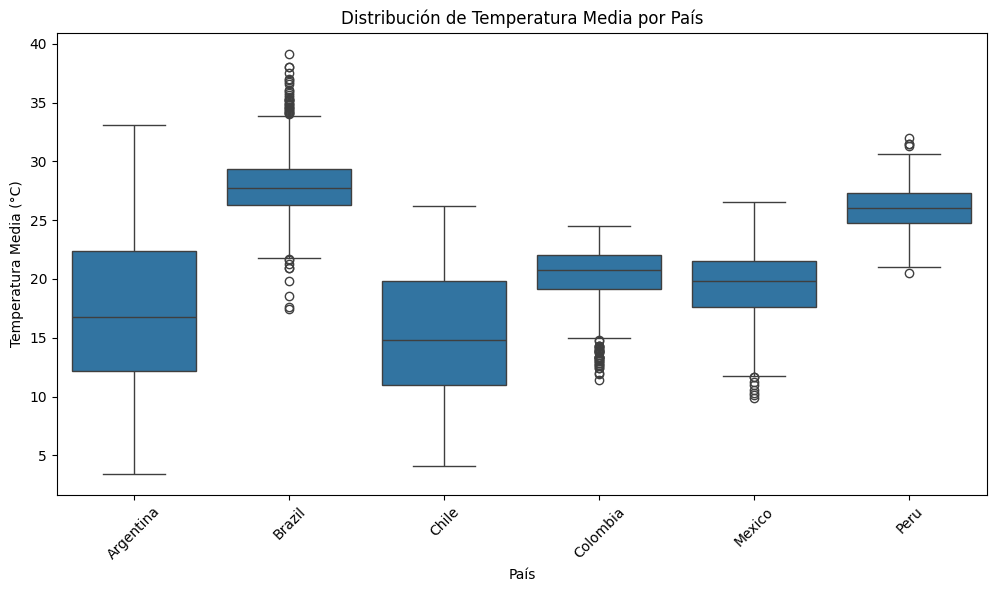

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises)
plt.title('Distribución de Temperatura Media por País')
plt.xlabel('País')
plt.ylabel('Temperatura Media (°C)')
plt.xticks(rotation=45)
plt.show()


#### Este grafico permite ver la distribución de las temperaturas medias para cada país, comparar la variabilidad de la temperatura media entre los países e identificar posibles outliers, que podrían indicar países con temperaturas inusualmente altas o bajas

#### Gráfico de Violín:

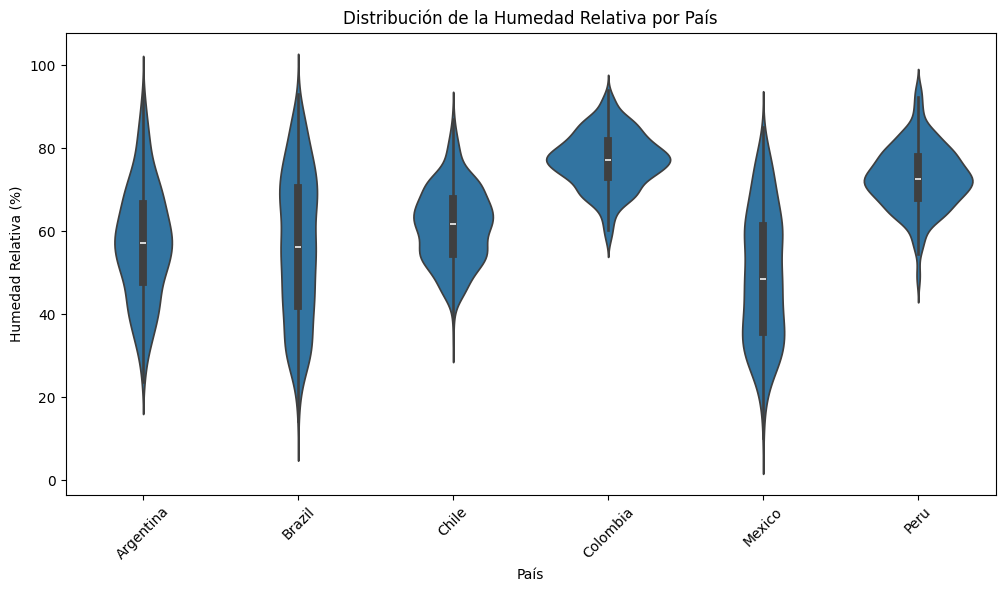

In [31]:
plt.figure(figsize=(12,6))
sns.violinplot(x='country_name', y='relative_humidity', data=data_latinoamerica_paises)
plt.title('Distribución de la Humedad Relativa por País')
plt.xlabel('País')
plt.ylabel('Humedad Relativa (%)')
plt.xticks(rotation=45)
plt.show()


####  Este grafico nos permite ver la distribución de la humedad relativa en cada país, comparar las variaciones en la humedad relativa entre diferentes países y e identificar si hay un rango específico de humedad en el que se concentran la mayoría de los datos

#### Mapa de calor

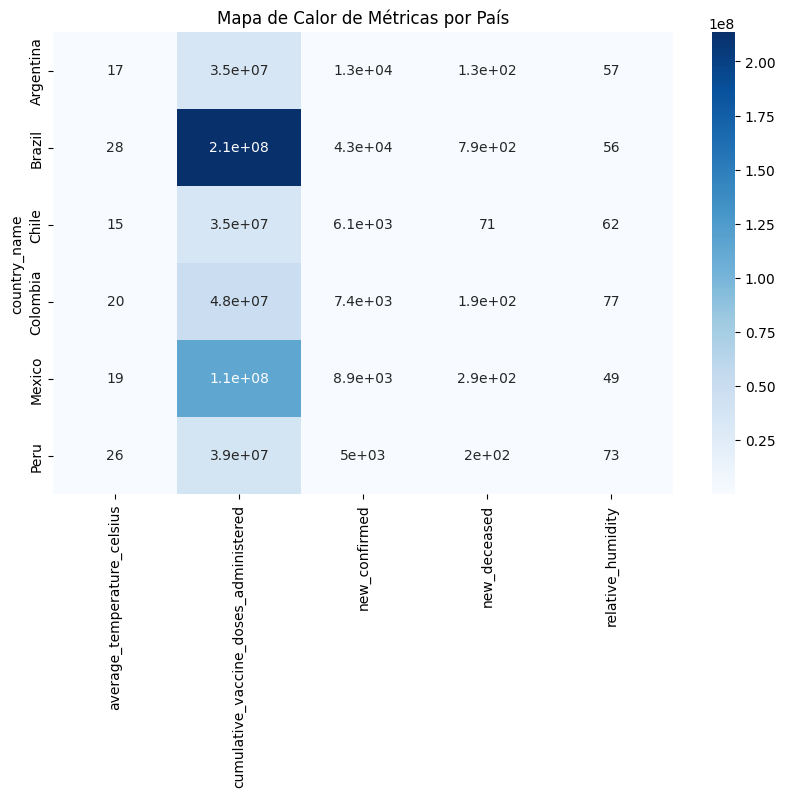

In [32]:
# Seleccionar algunas métricas
metrics = ['new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered', 'average_temperature_celsius', 'relative_humidity']
heatmap_data = data_latinoamerica_paises.pivot_table(index='country_name', values=metrics, aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title('Mapa de Calor de Métricas por País')
plt.show()


#### Este mapa de calor nos permite comparar rápidamente las diferentes métricas entre los países, dentificar patrones, como países con un alto número de nuevos casos confirmados o nuevas muertes y aquellos con un alto número de dosis de vacunas administradas y Observar la relación entre la temperatura media y la humedad relativa con las métricas de COVID-19

#### Gráfico de Dispersión con Regresión:

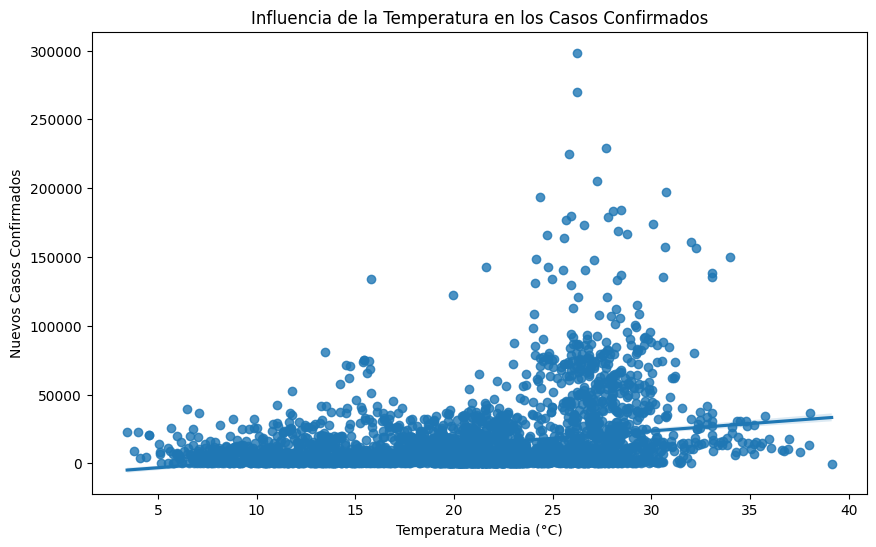

In [33]:
# Gráfico de la tendencia de casos confirmados vs temperatura media
plt.figure(figsize=(10,6))
sns.regplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises)
plt.title('Influencia de la Temperatura en los Casos Confirmados')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Nuevos Casos Confirmados')
plt.show()


#### El gráfico permite visualizar la relación entre la temperatura media y los nuevos casos confirmados de COVID-19, si hay una tendencia positiva (más casos con mayor temperatura) o negativa (más casos con menor temperatura) y la línea de regresión ayuda a entender la dirección y la fuerza de la relación entre las dos variables

####  Histograma de Casos Confirmados por País

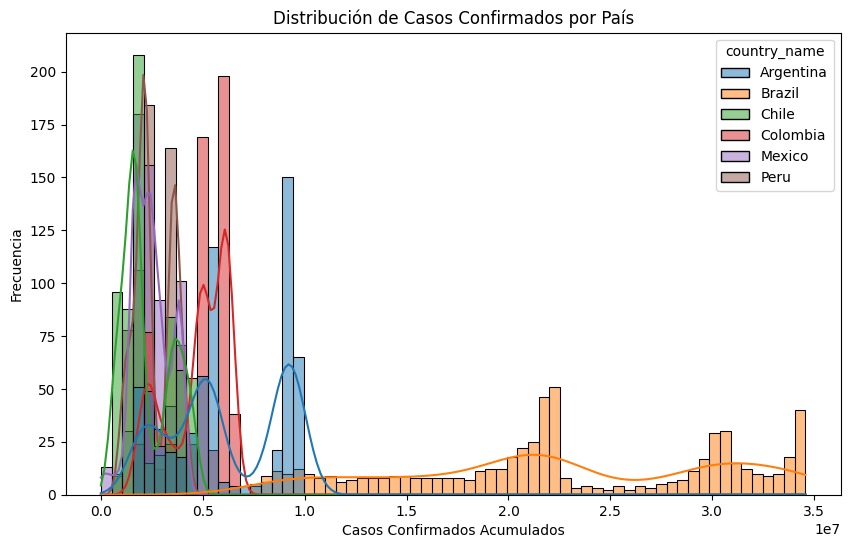

In [35]:
#Este gráfico permite visualizar cómo se distribuyen los casos confirmados de COVID-19 en los distintos países.
plt.figure(figsize=(10,6))
sns.histplot(data=data_latinoamerica_paises, x="cumulative_confirmed", hue="country_name", kde=True)
plt.title("Distribución de Casos Confirmados por País")
plt.xlabel("Casos Confirmados Acumulados")
plt.ylabel("Frecuencia")
plt.show()


##### Este gráfico permite visualizar la distribución de los casos confirmados acumulados de COVID-19 en los diferentes países, comparar cómo se comportan los casos acumulados entre los países, identificando aquellos con un número alto o bajo de casos y la curva de densidad proporciona una idea más clara de cómo se distribuyen los datos y si hay algún patrón o tendencia notable

#### Gráfico de Barras Comparando Dosis Administradas

C:\Users\ptorr\AppData\Local\Temp\ipykernel_24724\2817421300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='new_confirmed', data=data_latinoamerica_paises, palette='coolwarm')


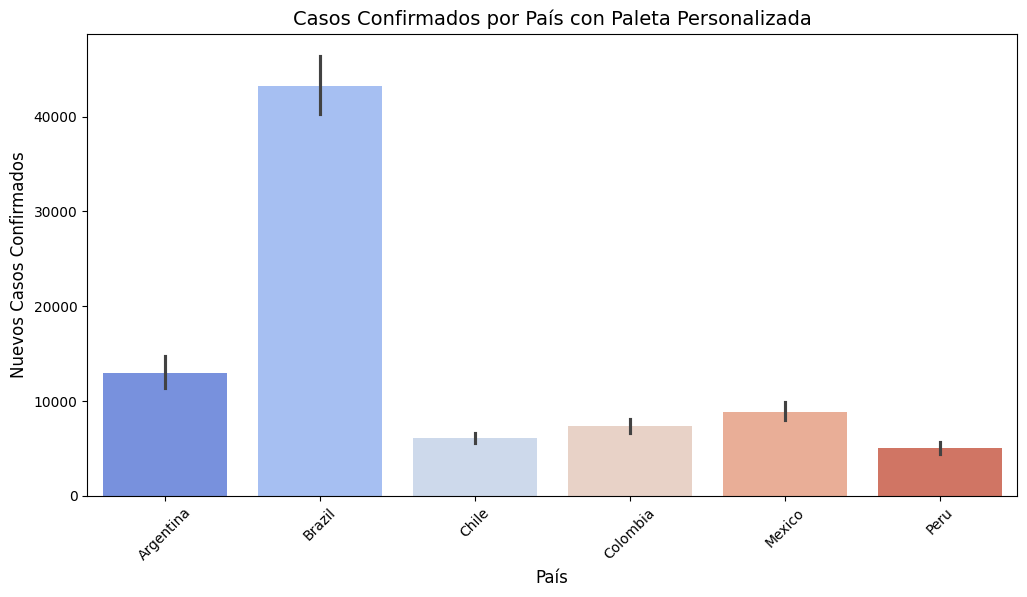

In [40]:
#Este gráfico compara las dosis administradas de vacunas entre los diferentes países.
plt.figure(figsize=(12,6))
sns.barplot(x='country_name', y='new_confirmed', data=data_latinoamerica_paises, palette='coolwarm')
plt.title('Casos Confirmados por País con Paleta Personalizada', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Nuevos Casos Confirmados', fontsize=12)
plt.xticks(rotation=45)
plt.show()


##### Este gráfico permite visualizar la comparación directa del número de nuevos casos confirmados entre los países, identificar rápidamente cuáles países tienen un número alto o bajo de nuevos casos y lo que puede ser útil para el análisis epidemiológico y la planificación de respuestas de salud pública

#### Diagrama de Dispersión: Temperatura Media vs Casos Confirmados

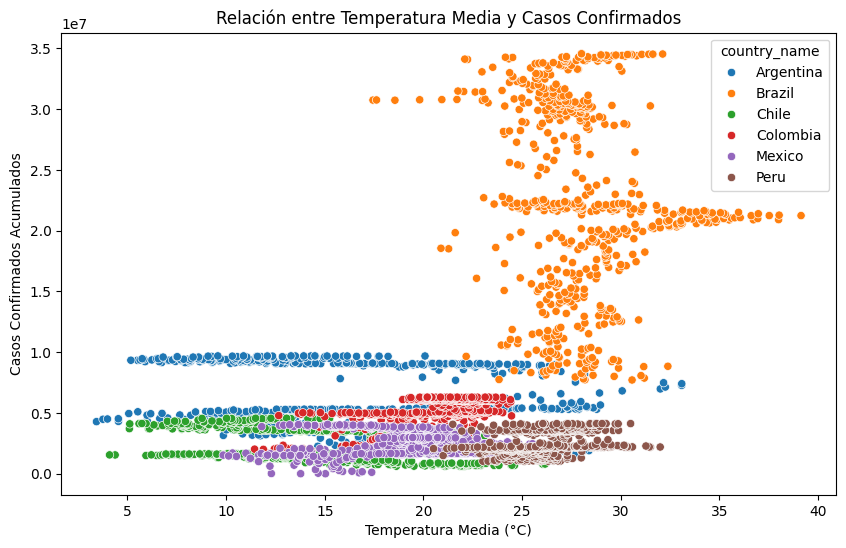

In [38]:
# Este gráfico te permite explorar si existe alguna relación entre la temperatura media de un país y los casos confirmados de COVID-19.
plt.figure(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y="cumulative_confirmed", hue="country_name", data=data_latinoamerica_paises)
plt.title("Relación entre Temperatura Media y Casos Confirmados")
plt.xlabel("Temperatura Media (°C)")
plt.ylabel("Casos Confirmados Acumulados")
plt.show()


##### Este gráfico permite explorar si hay una correlación entre la temperatura media de un país y el número de casos confirmados acumulados, identificar si hay patrones, como si ciertos países con temperaturas más altas o más bajas tienden a tener más o menos casos acumulados y la visualización ayuda a entender posibles factores ambientales que podrían influir en la propagación del virus


#### Evolución de Dosis Administradas por Mes de Cada País

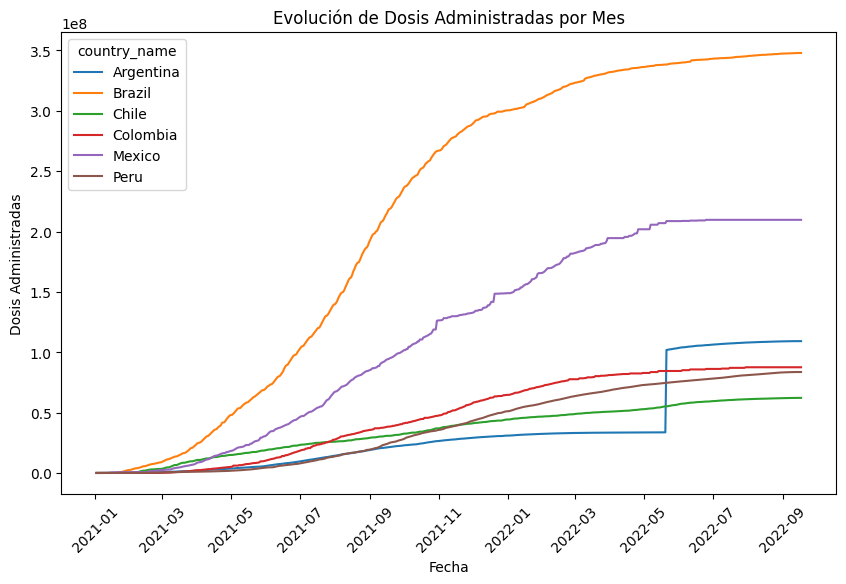

In [39]:
#Este gráfico muestra cómo han ido aumentando las dosis administradas a lo largo del tiempo en los diferentes países.
plt.figure(figsize=(10,6))
sns.lineplot(x="date", y="cumulative_vaccine_doses_administered", hue="country_name", data=data_latinoamerica_paises)
plt.title("Evolución de Dosis Administradas por Mes")
plt.xlabel("Fecha")
plt.ylabel("Dosis Administradas")
plt.xticks(rotation=45)
plt.show()


#### Este gráfico permite visualizar cómo han aumentado las dosis de vacunas administradas en cada país a lo largo del tiempo, identificar tendencias, como periodos de aumento rápido o lento en la administración de vacunas y comparar el progreso de diferentes países en su campaña de vacunación

In [ ]:
# Filtrar solo las columnas numéricas
data_numerica = data_latinoamerica_paises.select_dtypes(include=[np.number])

# Matriz de correlación
plt.figure(figsize=(12,8))
matriz_correlacion = data_numerica.corr()

# Mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', mask=np.tril(matriz_correlacion), vmin=0.5)
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()

##### Este mapa te permite ver qué variables están altamente correlacionadas entre sí, lo que da pistas sobre la relación entre la incidencia de COVID-19, la vacunación y otros factores como la temperatura. Identificar una correlación alta entre variables como la temperatura y los casos confirmados ayuda a deducir una influencia climática en la propagación del virus. Del mismo modo, correlaciones entre las tasas de vacunación y la disminución de casos podrían sugerir la efectividad de la vacunación.

### Conclusiones de la identificacion de patrones y tendencias 

### Los países con mayores tasas de vacunación como Chile o Brasil suelen mostrar una estabilización más rápida en el número de casos y una disminución de las tasas de mortalidad conforme avanzan las campañas de vacunación
### Los países de clima más cálido como México y Brasil muestran una propagación distinta comparada con países de clima más frío
### En muchos países, especialmente aquellos del hemisferio sur, es común observar un aumento de casos durante los meses de invierno es decir que aumentan durante junio, julio, agosto
### Los meses con una mayor cantidad de dosis administradas coinciden generalmente con una disminución de nuevos casos y muertes
### Hay una leve correlación entre la temperatura y los casos de COVID-19, donde temperaturas más bajas coinciden con un aumento en los casos, sugiriendo un posible patrón estacional
### Se ve una correlación positiva entre variables como el número de vacunaciones y la disminución de casos graves o muertes en varios países
### Podemos apreciar que con estrategias de vacunación más rápidas como es en el caso de Chile, tienden a controlar mejor los brotes

# Avance 3

In [24]:
# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


### Análisis Exploratorio de Datos

#### Análisis de Series Temporales

##### Realizamos un analisis de; comportamiento de manera semanal y anual. 

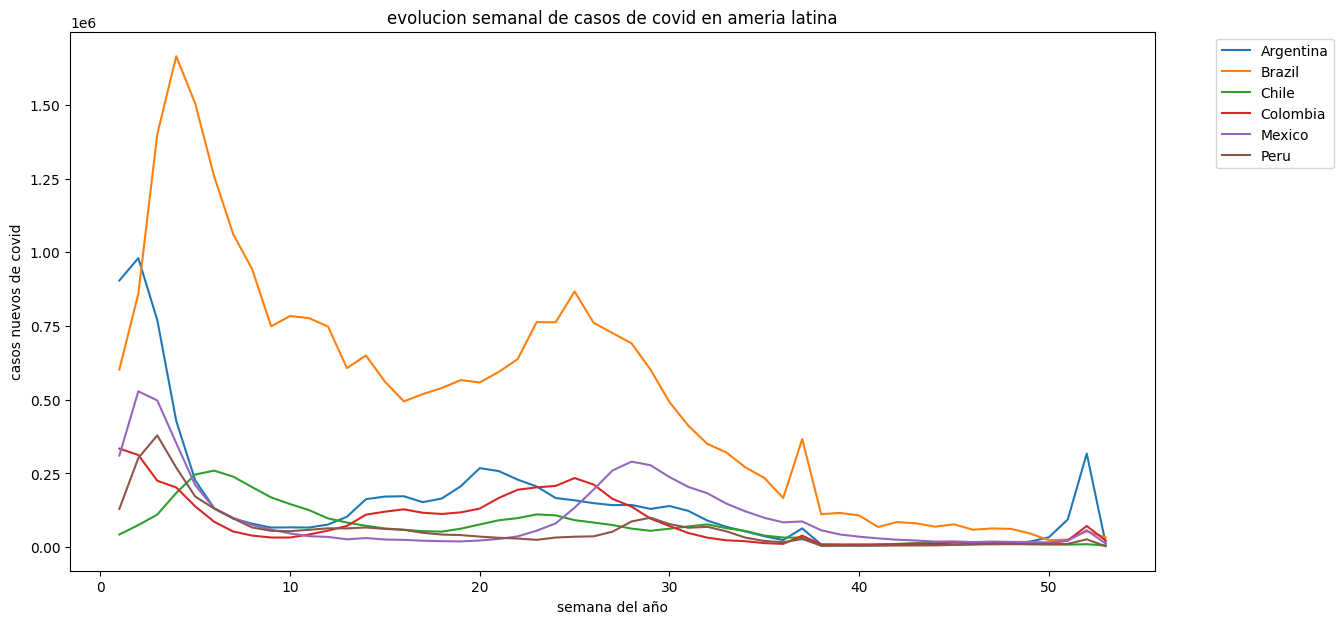

In [12]:
#analizamos como evoliciopnan los casos de covid a lo largo de la semana
    
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
casos_semanales = data_latinoamerica_paises.groupby(['country_name','week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for country in casos_semanales['country_name'].unique():
    country_casos_semanales = casos_semanales[casos_semanales['country_name'] == country]
    plt.plot(country_casos_semanales['week'],country_casos_semanales['new_confirmed'], label=country) 
    
plt.xlabel('semana del año') 
plt.ylabel('casos nuevos de covid')
plt.title('evolucion semanal de casos de covid en ameria latina')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

#### Ahora lo hacemos por año

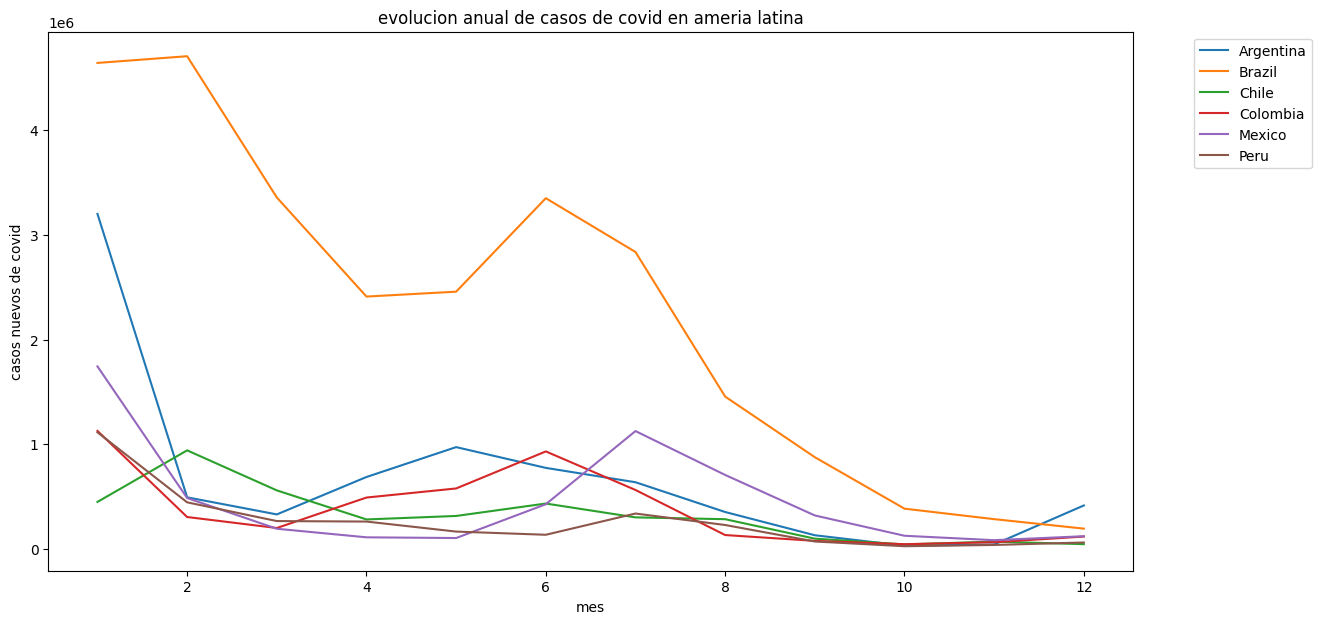

In [13]:
data_latinoamerica_paises['month'] = data_latinoamerica_paises.index.month
casos_anuales = data_latinoamerica_paises.groupby(['country_name','month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for country in casos_anuales['country_name'].unique():
    country_casos_anuales = casos_anuales[casos_anuales['country_name'] == country]
    plt.plot(country_casos_anuales['month'],country_casos_anuales['new_confirmed'], label=country) 
    
plt.xlabel('mes') 
plt.ylabel('casos nuevos de covid')
plt.title('evolucion anual de casos de covid en america latina')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

#### Gracias a los graficos anteriores podemos apreciar como fueron bajando la cantidad de casos y muertes de covid con el pasar del tiempo. Igualmente se nota un pico enb las ultimas fechas

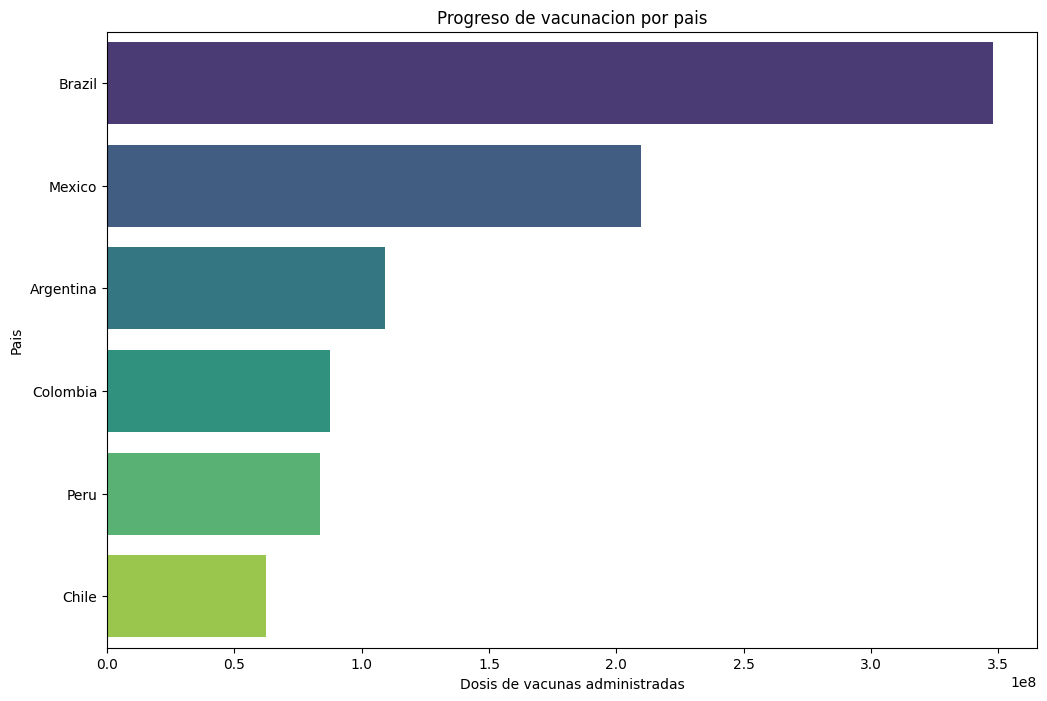

In [14]:
data_vacunacion = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=data_vacunacion.values, y=data_vacunacion.index, hue=data_vacunacion.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title('Progreso de vacunacion por pais')
plt.show()

#### Este resultado indica que Brasil es el pais que mas dosis administro y el que menos dosis administro fue Chile. Eesto se contradice con lo analizado anteriormente, sin embargo no se tiene en cuenta la poblacion de cada pais

##### Lo siguiente que vamos a ver es como se comporta la temperatura en los paises seleccionados

C:\Users\ptorr\AppData\Local\Temp\ipykernel_8848\1802593468.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax1.plot(data_latinoamerica_paises.resample('M').mean(numeric_only=True).index, data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'], color='red', label='Nuevos casos confirmados')
C:\Users\ptorr\AppData\Local\Temp\ipykernel_8848\1802593468.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax2.plot(data_latinoamerica_paises.resample('M').mean(numeric_only=True).index, data_latinoamerica_paises.resample('M').mean(numeric_only=True)['average_temperature_celsius'], color='green', label='Temperatura promedio')


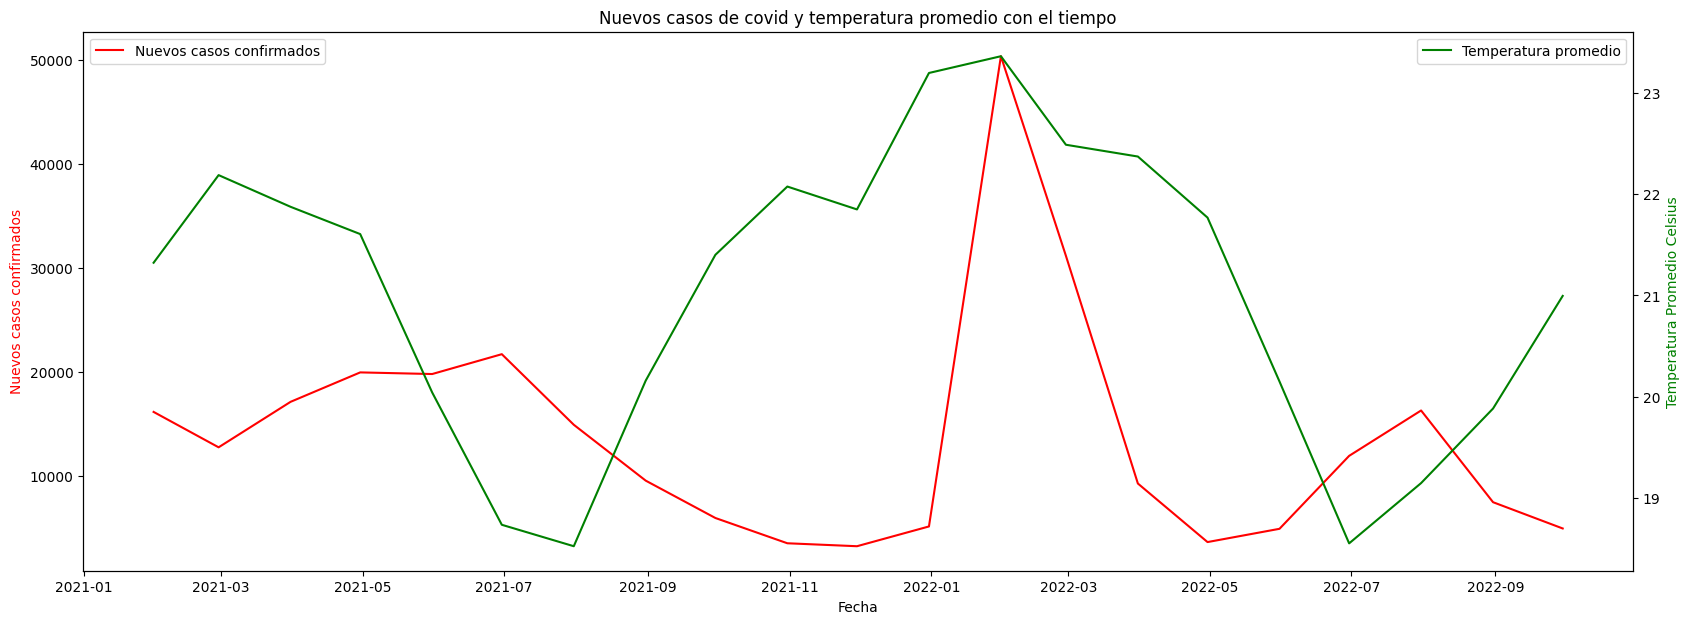

In [15]:
# graficamos la relacion entre la temperatura y los casos nuevos de covid
plt.figure(figsize=(20,7))
ax1=plt.gca()
ax2 = ax1.twinx()
ax1.plot(data_latinoamerica_paises.resample('M').mean(numeric_only=True).index, data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'], color='red', label='Nuevos casos confirmados')
ax2.plot(data_latinoamerica_paises.resample('M').mean(numeric_only=True).index, data_latinoamerica_paises.resample('M').mean(numeric_only=True)['average_temperature_celsius'], color='green', label='Temperatura promedio')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura Promedio Celsius', color='green')
plt.title('Nuevos casos de covid y temperatura promedio con el tiempo')
ax1.legend(loc= 'upper left')
ax2.legend(loc= 'upper right')
plt.show()

#### Mediante este grafico pordemos apreciar como es que a medida que subia la temperatura bajaban los casos, sin embargo tambien hay un pico antes de marzo, igualmente bajo rapidamente y lo podriamos adjudicar a la cantidad de personas que se vacunaron 

#### Analizamos la densiadad de la poblacion en cada pais

C:\Users\ptorr\AppData\Local\Temp\ipykernel_8848\3731347090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos_urbanos['urban_population_percentage'], y=casos_urbanos.index, palette='viridis')


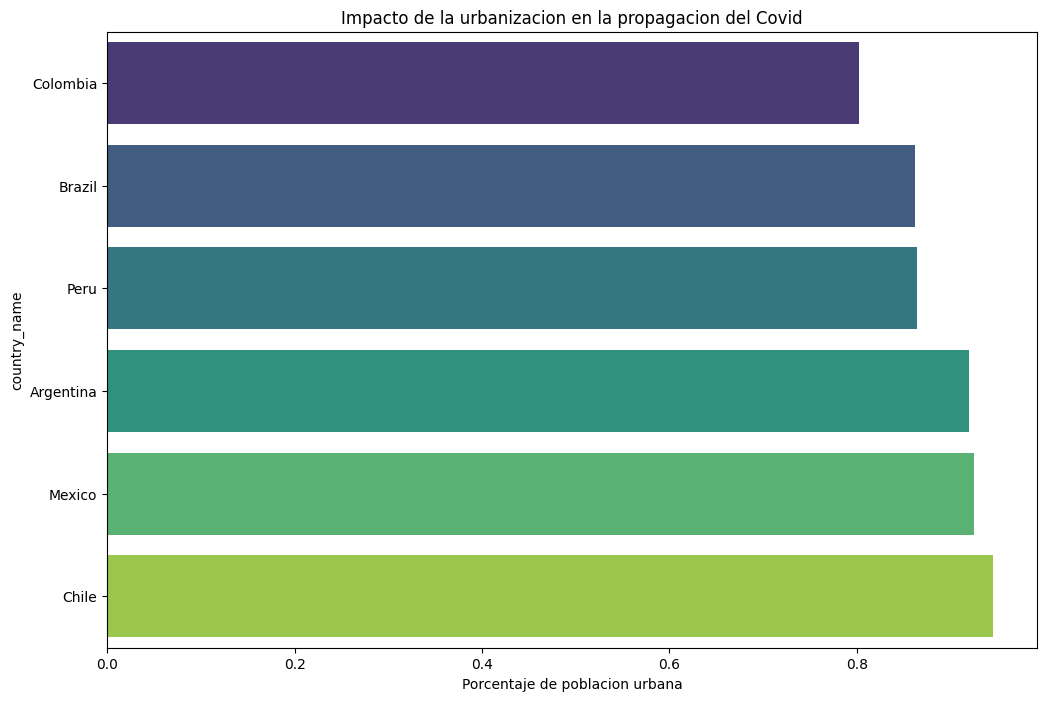

In [16]:
data_latinoamerica_paises['urban_population_percentage']=data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
casos_urbanos= data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12,8))
sns.barplot(x=casos_urbanos['urban_population_percentage'], y=casos_urbanos.index, palette='viridis')
plt.xlabel('Porcentaje de poblacion urbana')
plt.title('Impacto de la urbanizacion en la propagacion del Covid')
plt.show()

#### este grafico muestra coomo Chile fue el pais donde mas se propago el virus sin embargo cabe destacar w=que este resultado es un tanto extraño ya que Chile fue de los paises que mejor supieron manejar la pandemia

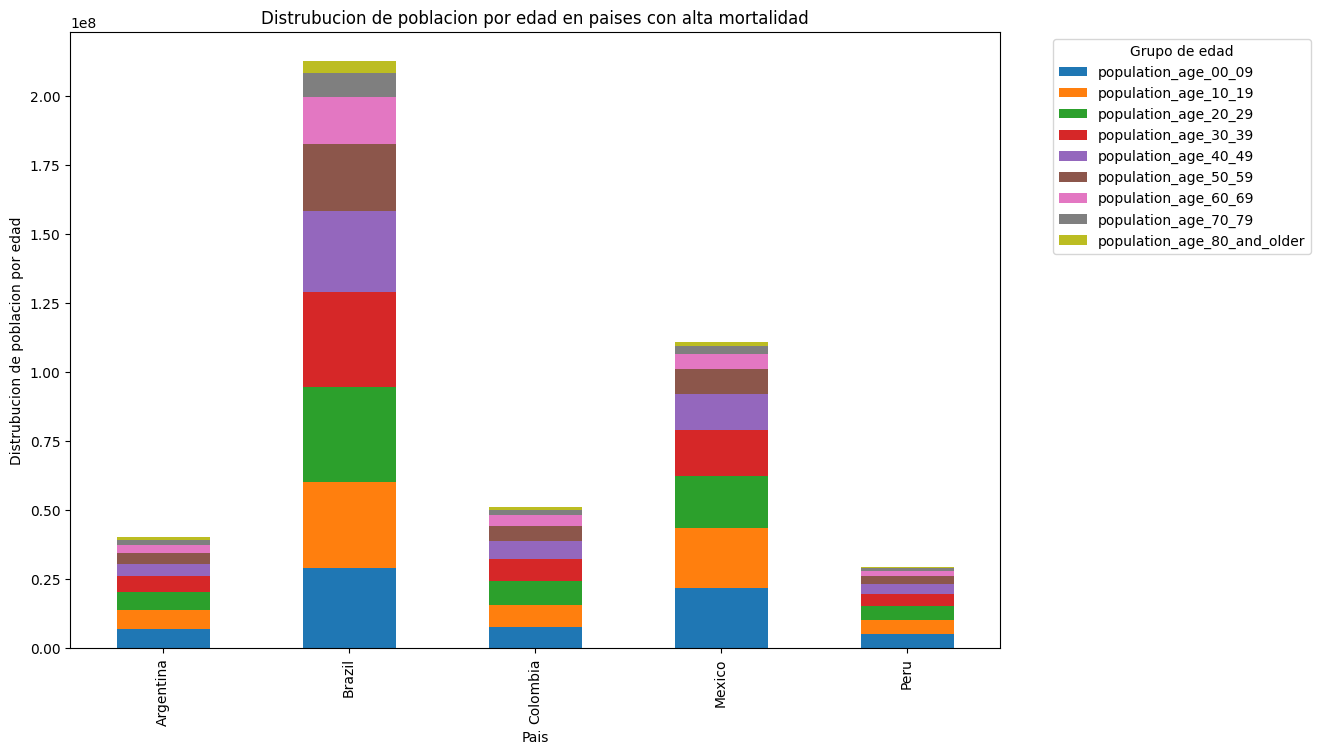

In [48]:
paises_alta_mortalidad = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
grupos_edad = ['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
distribucion_edad = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(paises_alta_mortalidad)].groupby('country_name')[grupos_edad].mean()

distribucion_edad.plot(kind='bar',stacked=True, figsize=(12,8))
plt.xlabel('Pais')
plt.ylabel('Distrubucion de poblacion por edad')
plt.title('Distrubucion de poblacion por edad en paises con alta mortalidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de edad')
plt.show()

#### En este grafico se donota una gran desigualdad en la cantidad de poblacion por grupos de edad 

#### Ahora buscamos como fueron de exitosas o no las estratedias de vacunacion

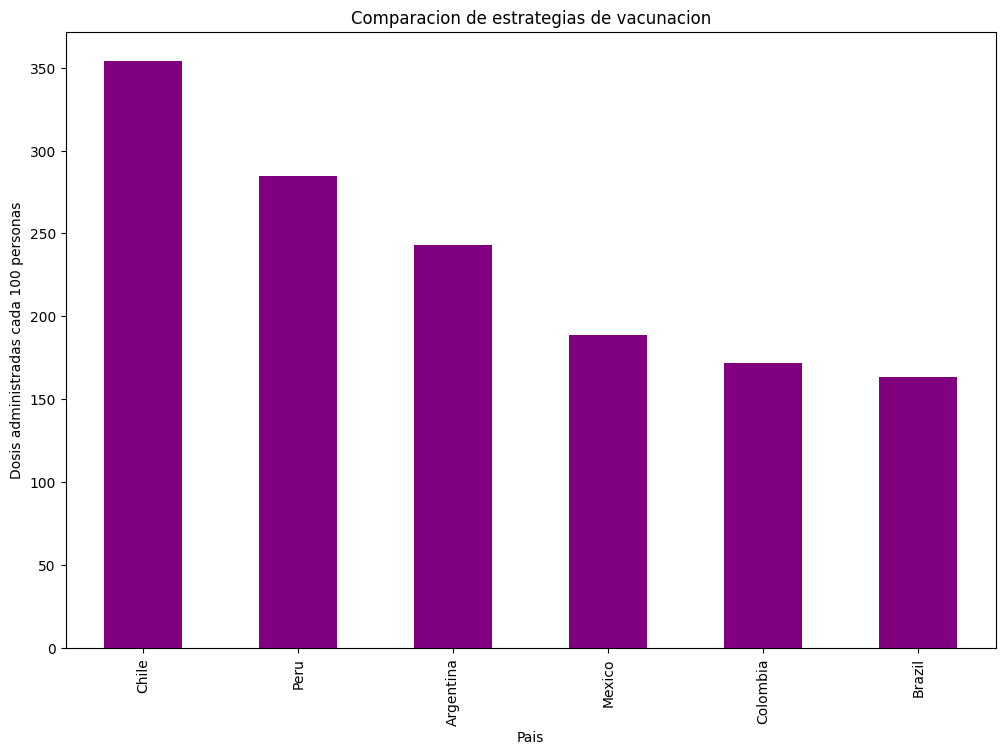

In [18]:
estrategia_vacunacion = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max()/data_latinoamerica_paises.groupby('country_name')['population'].mean()*100
estrategia_vacunacion.sort_values(ascending=False).plot(kind='bar', figsize=(12,8), color='purple')
plt.xlabel('Pais')
plt.ylabel('Dosis administradas cada 100 personas')
plt.title('Comparacion de estrategias de vacunacion')
plt.show()

#### En este grafico volvemos a poder apreciar como funcionaron las estrategias de vacunacion en Chile y como fallaron en mas que nada Brasil y Colombia

#### Todos estos graficos y analisis empezamos a ver cuales son los paises que mas ayuda necesitan y donde deberian abrirse los nuevos centros

#### Ahora vamos a calcular el porcentaje de diabetes para identificar paises

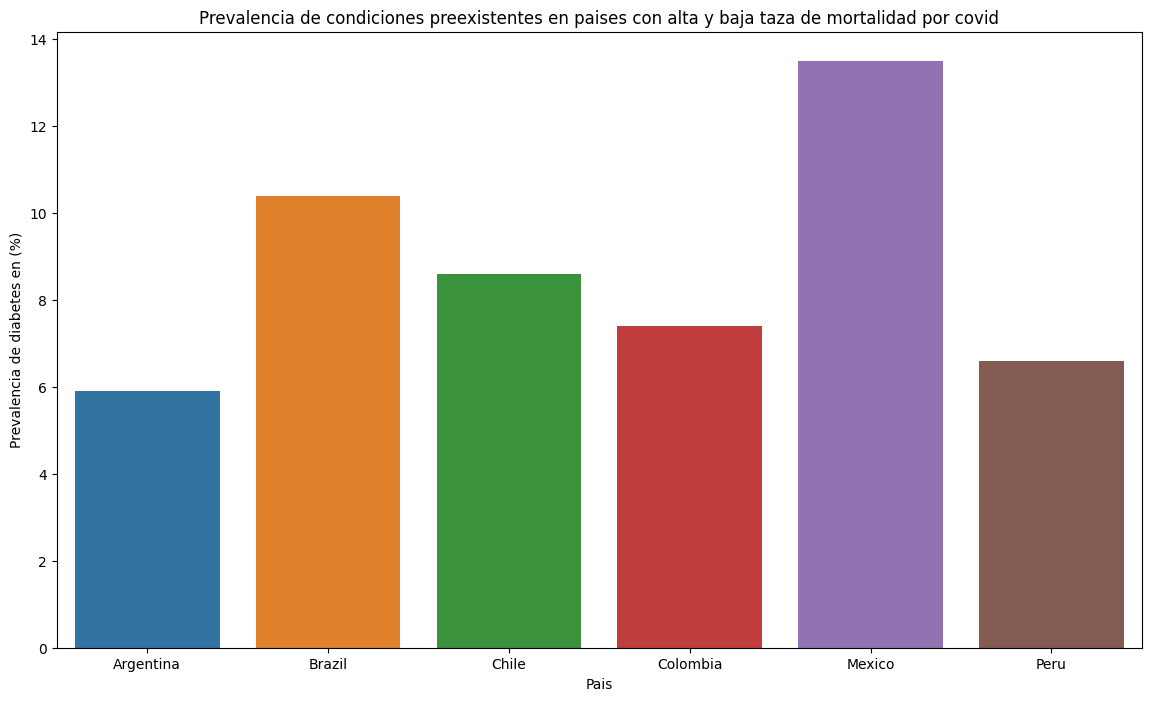

In [26]:
# Vemos la prevalencia de diabetes
top_countries=data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries=data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
conditions_data=data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries.union(bottom_countries))]
plt.figure(figsize=(14,8))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de diabetes en (%)')
plt.title('Prevalencia de condiciones preexistentes en paises con alta y baja taza de mortalidad por covid')
plt.show()

#### Ahora hacemos lo mismo pero con los fumadores

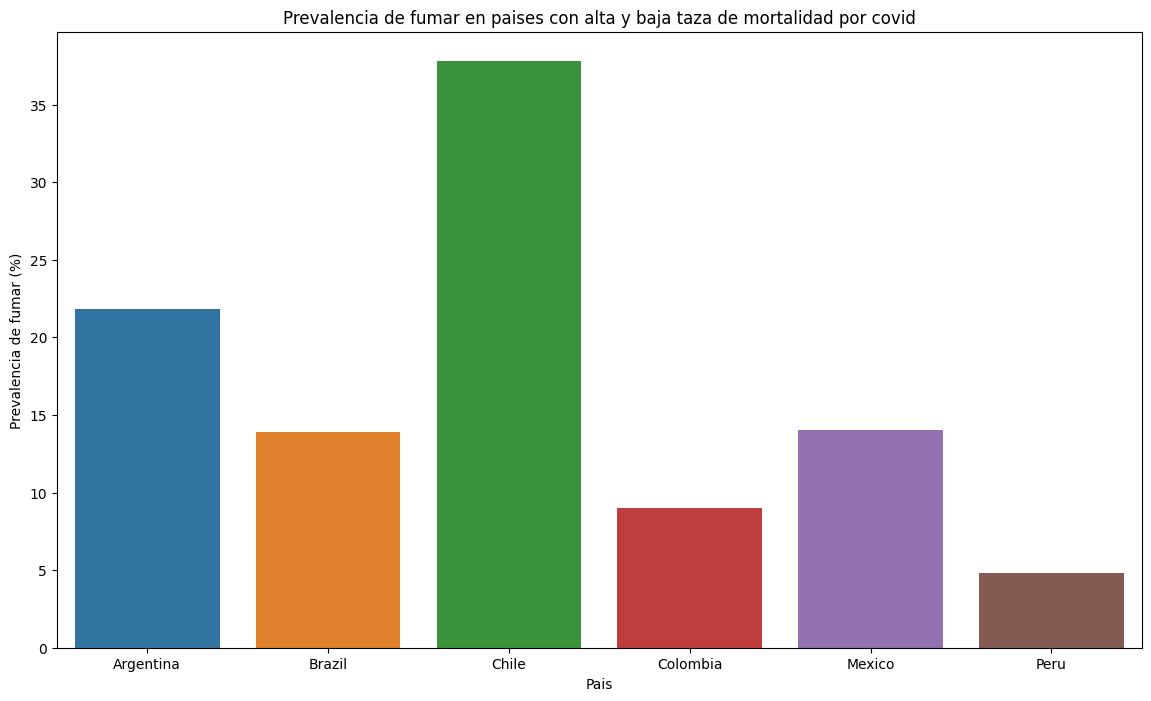

In [27]:
plt.figure(figsize=(14,8))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de fumar (%)')
plt.title('Prevalencia de fumar en paises con alta y baja taza de mortalidad por covid')
plt.show()

#### Luego de analizar los graficos vemos que los  paises mas afectados por la diabetes son Brasil y Mexico, con lo que respecta a fumar tenemos que Chile y Argentina fueron los ms afectados.

#### Pero ahora tenemos que ver como afecto a la mortalidad

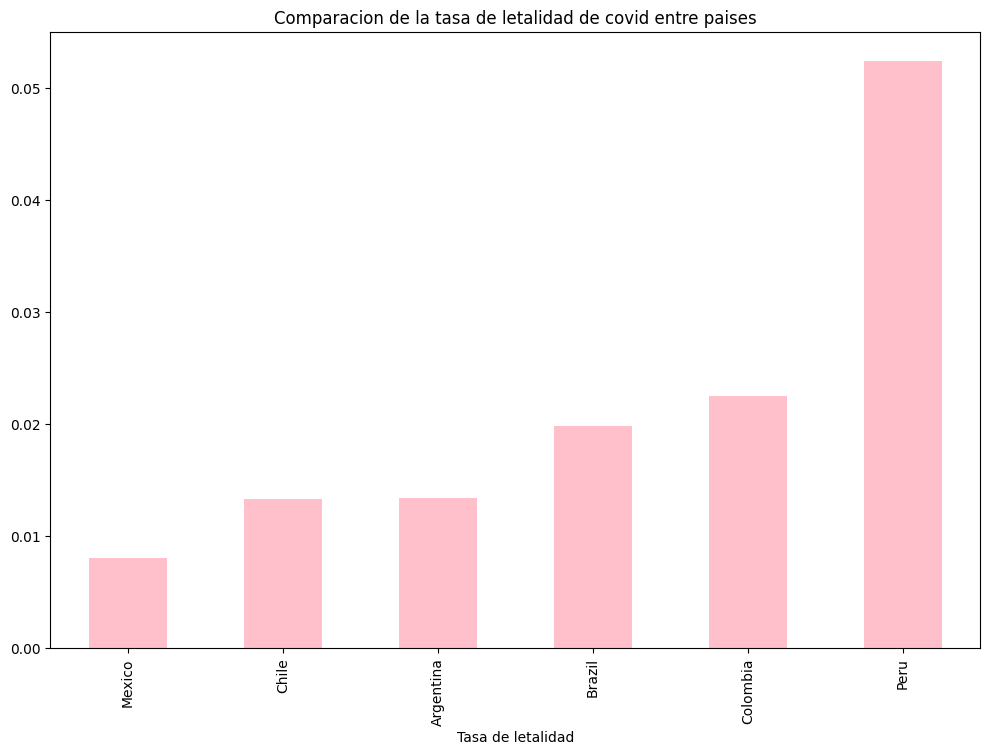

In [28]:
#vemos la fatalidad por pais
data_latinoamerica_paises['case_fatality_rate']=data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
tasa_fatalidad = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

#Ahora con esta data armamos el grafico
plt.figure(figsize=(12,8))
tasa_fatalidad.plot(kind='bar', color='pink')
plt.xlabel('Tasa de letalidad')
plt.title('Comparacion de la tasa de letalidad de covid entre paises')
plt.show()

#### Las muertes y los casos nuevos variaron debido a la vacunacion y a las medidas que cada pais sostuvo. Ademas de todo esto, fueron bajando las personas que se contagiaron y las que murieron

C:\Users\ptorr\AppData\Local\Temp\ipykernel_8848\201279076.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='maroon', label='Nuevos casos')
C:\Users\ptorr\AppData\Local\Temp\ipykernel_8848\201279076.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_paises.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='purple', label='Porcentaje de la poblacion vacunada')


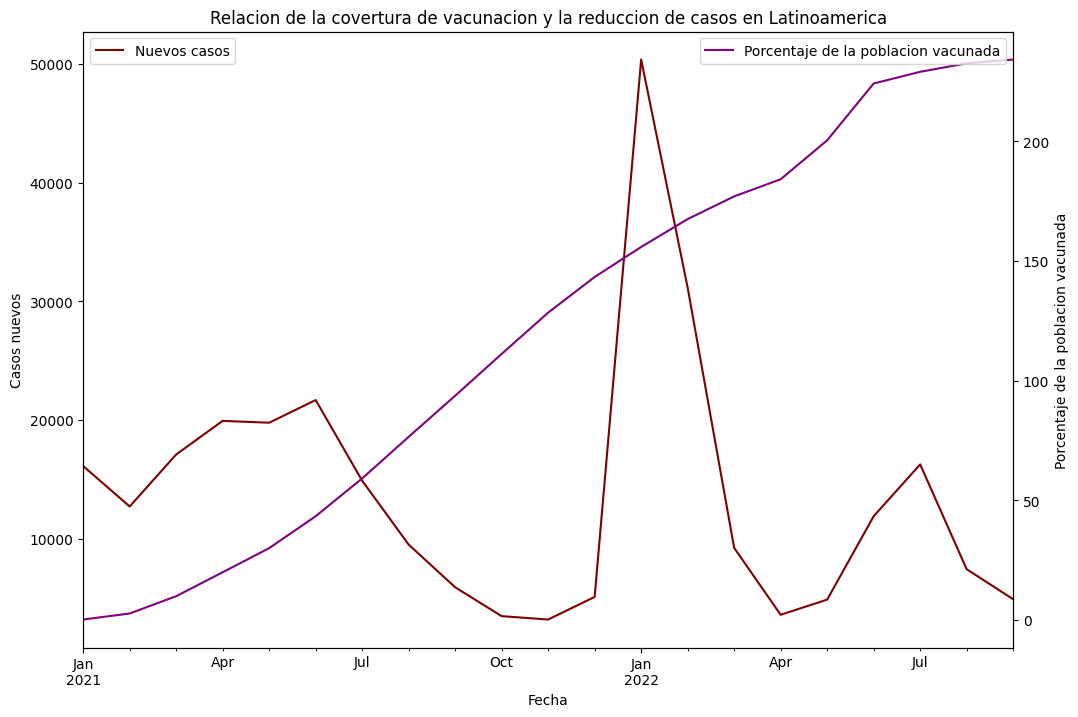

In [33]:
#vemos como evoluciona la vacunacio y los casos de covid en Latinoamerica
plt.figure(figsize=(12,8))
ax1 = plt.gca()
ax2 = ax1.twinx()

#creamos los porcentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated']=data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population']*100
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='maroon', label='Nuevos casos')
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='purple', label='Porcentaje de la poblacion vacunada')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos nuevos')
ax2.set_ylabel('Porcentaje de la poblacion vacunada')
ax1.set_title('Relacion de la covertura de vacunacion y la reduccion de casos en Latinoamerica')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

#### Ahora vamos a ver como evoluciono la mortalidad 


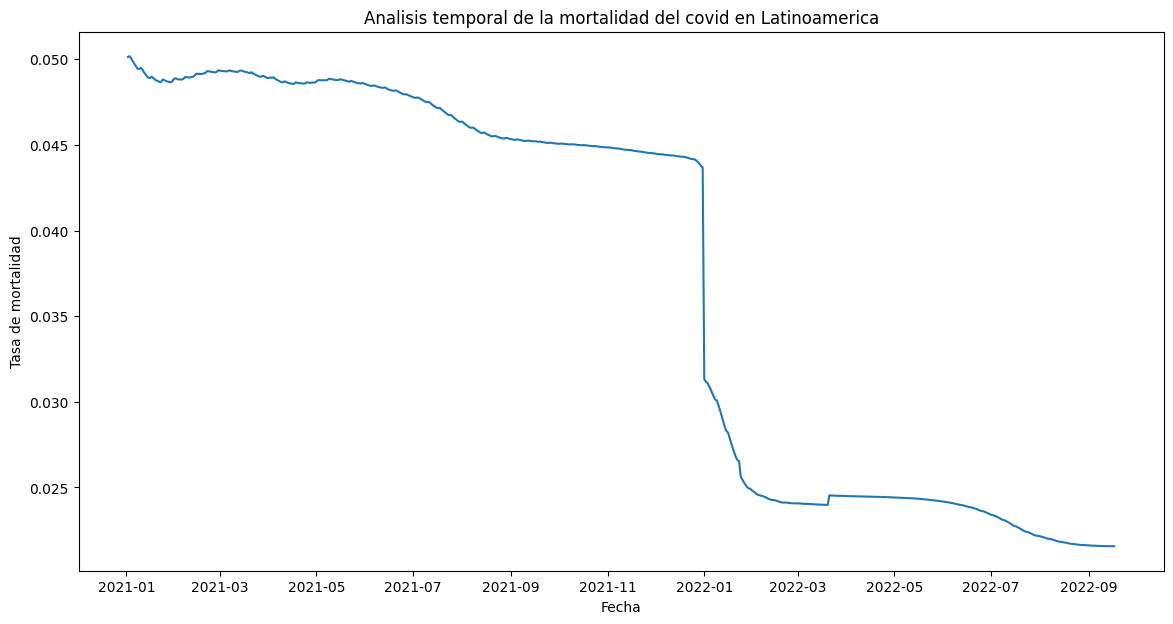

In [36]:
data_latinoamerica_paises['mortality_rate']=data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', errorbar=None)
plt.title('Analisis temporal de la mortalidad del covid en Latinoamerica')
plt.xlabel('Fecha')
plt.ylabel('Tasa de mortalidad')
plt.show()

#### Finalmente podemos ver como los recuperados han aumentado y los casos activos dismunuyeron 
##### Esto es devido a la estrategia de vacunacion de cada pais y las medidas que cada uno haya tomado

C:\Users\ptorr\AppData\Local\Temp\ipykernel_8848\1746784439.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_latinoamerica_paises.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos activos')
C:\Users\ptorr\AppData\Local\Temp\ipykernel_8848\1746784439.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_latinoamerica_paises.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos recuperados')


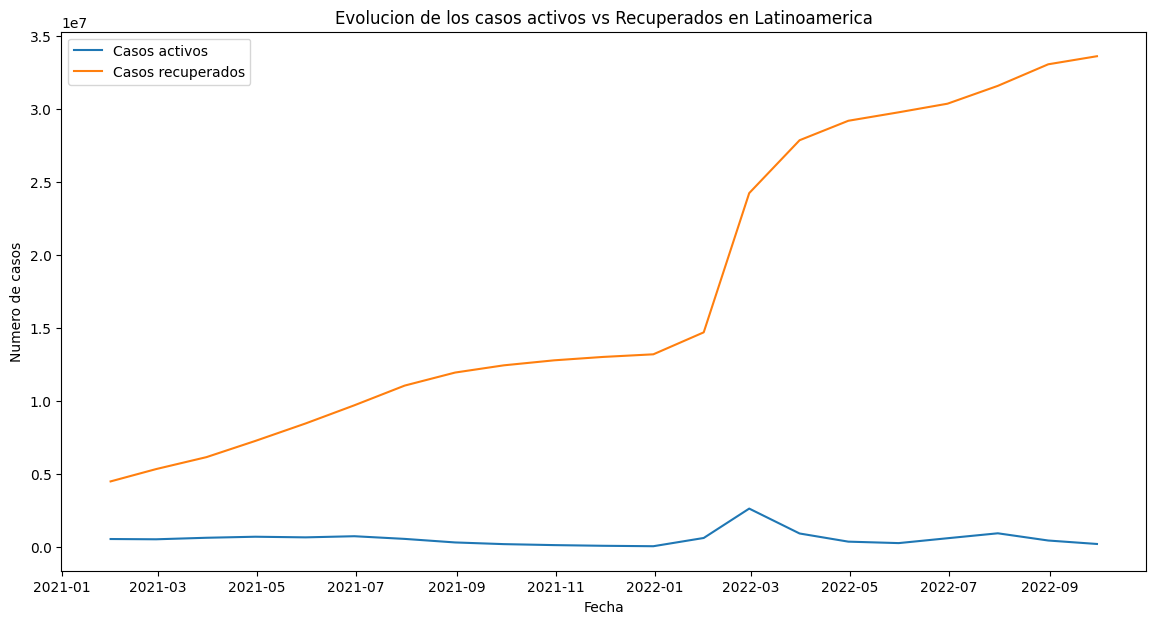

In [41]:
#Vemos como evolucionan los casos activos y los recuperados en Latinoamerica
data_latinoamerica_paises['active_cases']=data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos activos')
sns.lineplot(data=data_latinoamerica_paises.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos recuperados')
plt.xlabel('Fecha')
plt.ylabel('Numero de casos')
plt.title('Evolucion de los casos activos vs Recuperados en Latinoamerica')
plt.legend()
plt.show()

#### Finalmente hay qie ver y analizar la situacion actual, sabemos que algunos datos pueden parecer raros pero es por el conjunto de datos que se nos brindo para analizar

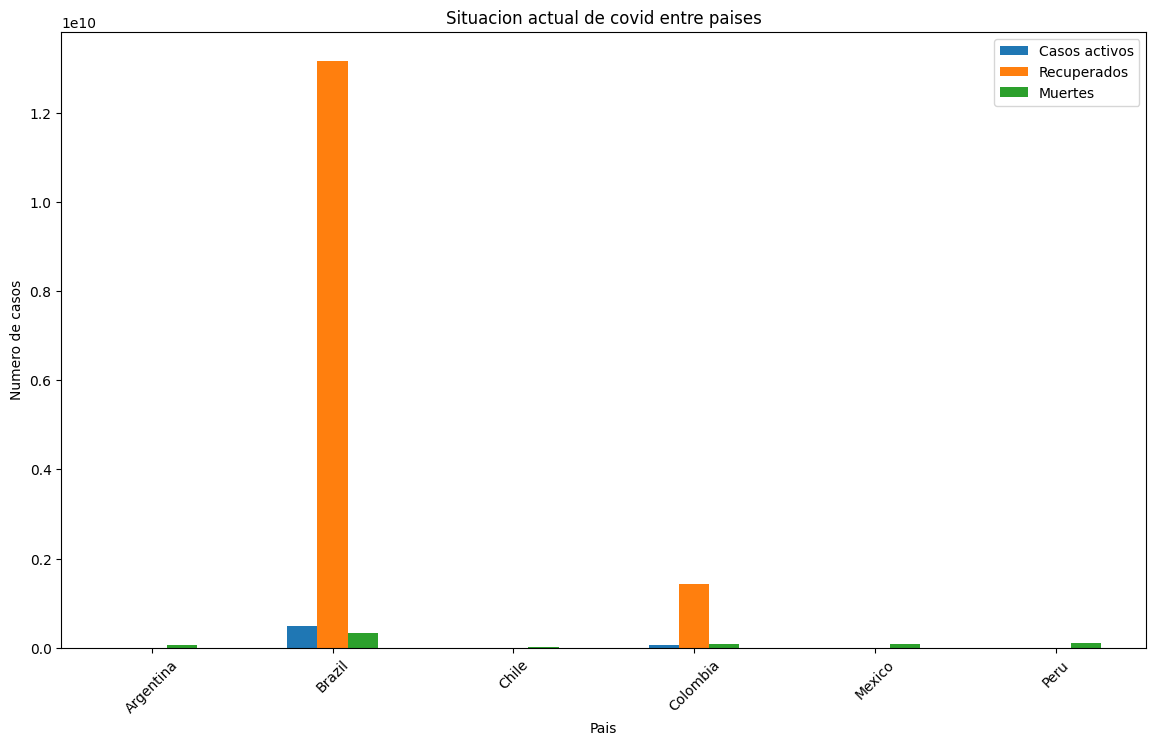

In [43]:
situacion_actual = data_latinoamerica_paises.groupby('country_name').sum()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]
situacion_actual.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Situacion actual de covid entre paises')
plt.xlabel('Pais')
plt.ylabel('Numero de casos')
plt.legend(['Casos activos','Recuperados','Muertes'])
plt.xticks(rotation=45)
plt.show()

### Para concluir en este avance, luego de analizar los graficos creo que seria conveniente que los paises donde la empresa se expanda sean Brasil, Colombia y Mexico. Esto es porque desde mi punto de vista y sosteniendome con los graficos podemos ver que claramente los paises con mas casos confirmados y con mas muerte fueron estos tres. A no olvidar tampoco que tienen la tasa mas baja de vacunas administradas. Si bien no sabemos cual fue exactamente la estrategia de cada pais, no obstante sabemos que debido a la base de datos brindada, no tenemos la candidad exacta de habitantes por pais, ni problemas o regularidades extras que esten afectando a las cantidade de afectados por covid.